# Import Libraries

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.dates as mdates
import datetime

# Morris Results

## Read individual files

In [2]:
# Import data
races = ['White','Black','Asian', 'Hispanic', 'AIAN']
morris = 'figures_morris'

df = []
for i in range(len(races)):
    x = pd.read_csv('./results/' + races[i] + '/' + morris + '/Morris.csv')
    df.append(x)
     
race_total = []
# Age 
for i in range(len(races)):
    race_total.append(df[i][df[i].Feature == races[i]])

## Plot

In [3]:
# Function for formatter
class OOMFormatter(mpl.ticker.ScalarFormatter):
    def __init__(self, order=0, fformat="%1.1f", offset=True, mathText=True):
        self.oom = order
        self.fformat = fformat
        mpl.ticker.ScalarFormatter.__init__(self,useOffset=offset,useMathText=mathText)
    def _set_order_of_magnitude(self):
        self.orderOfMagnitude = self.oom
    def _set_format(self, vmin=None, vmax=None):
        self.format = self.fformat
        if self._useMathText:
            self.format = r'$\mathdefault{%s}$' % self.format

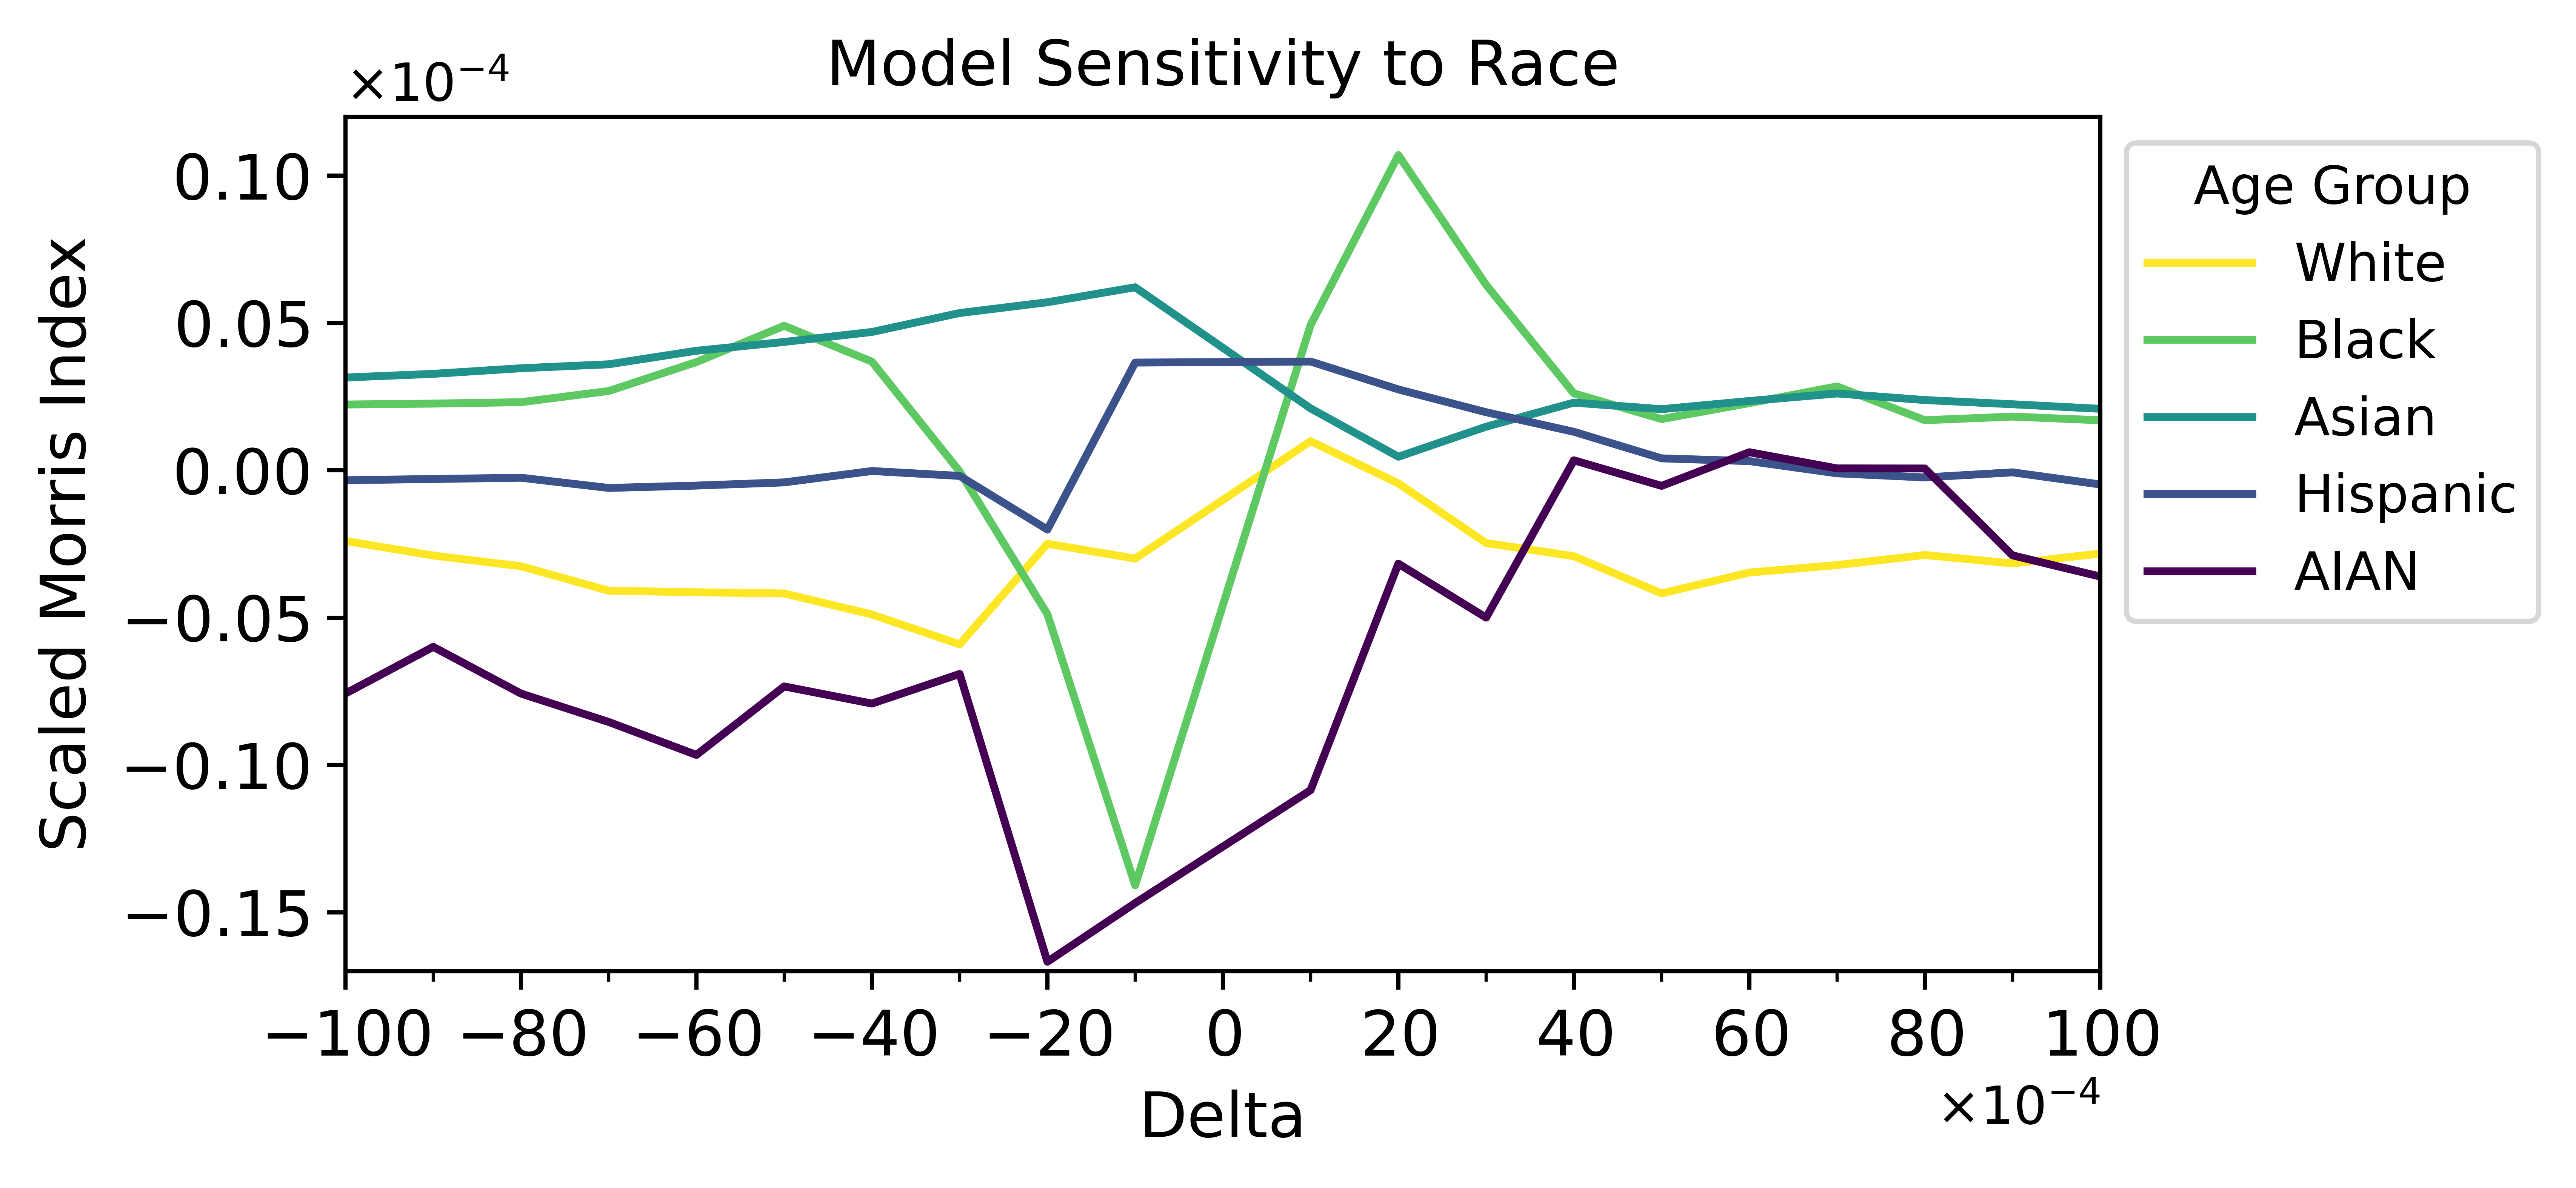

In [4]:
# Plot
mpl.rcParams['figure.dpi'] = 1000
fig, ax = plt.subplots(nrows=1, ncols=1, facecolor='w', sharey=True, figsize=(6, 3))
label = ['White','Black','Asian', 'Hispanic', 'AIAN']
color = ['#fde725', '#5ec962', '#21918c', '#3b528b', '#440154']

# plot the same data on both axes
for i in range(len(races)):
    plt.plot(race_total[i].Delta, race_total[i].Morris_sensitivity, '-', linewidth=1.5, label=label[i], color=color[i])
    
# Scale axes
ax.yaxis.set_major_formatter(OOMFormatter(-4, "%1.2f"))
ax.ticklabel_format(axis='y', style='sci', scilimits=(-4,-4))   
ax.xaxis.set_major_formatter(OOMFormatter(-4, "%1.0f"))
ax.ticklabel_format(axis='x', style='sci', scilimits=(-4,-4))
ax.xaxis.get_offset_text().set_visible(True)

# Format plot
ax.set_xticks([-0.01 , -0.008, -0.006, -0.004,
               -0.002, 0, 0.002, 0.004, 0.006,
               0.008, 0.01 ])
ax.set_xlim(-0.01, 0.01)
ax.set_ylim(-0.17e-4, 0.12e-4)

# Minor ticks
ax.set_xticks([-90e-4, -70e-4, -50e-4, -30e-4, -10e-4, 10e-4, 30e-4, 50e-4, 70e-4, 90e-4], minor=True)
#ax.set_yticks([-0.08e-4, -0.06e-4, -0.04e-4, -0.02e-4, 0, 0.02e-4, 0.04e-4, 0.06e-4], minor=False)
#ax.set_yticks([-0.07e-4, -0.05e-4, -0.03e-4, -0.01e-4, 0, 0.01e-4, 0.03e-4, 0.05e-4], minor=True)
ax.tick_params(axis='both', which='major', labelsize=12)

# Add labels
plt.ylabel('Scaled Morris Index', size=12)
plt.xlabel('Delta', size=12)
plt.title('Model Sensitivity to Race', size=12)
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left', title='Age Group')
plt.savefig('fig1.png', bbox_inches='tight')
plt.show()

## Combine individual morris dataframes

In [6]:
# Get delta values
for i in range(0, len(races)):
    df[i].Delta = round(df[i].Delta, 3)

deltas = list(df[0].Delta.unique())

In [7]:
ranking = pd.DataFrame()
ranking = ranking.reindex(index = races)

for j in range(len(deltas)): 
    morris_values = []
    for i in range(0, len(races)):
        x = df[i][(df[i]['Delta'] == deltas[j])
                & (df[i]['Feature'] != 'VaccinationFull')]['Morris_sensitivity']
        morris_values.append(x.values[0])

    ranking[str(deltas[j])] = morris_values

for i in ranking.columns: 
    ranking[i] = ranking[i].rank(ascending=False)

In [8]:
ranking

,-0.01,-0.009,-0.008,-0.007,-0.006,-0.005,-0.004,-0.003,-0.002,-0.001,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01
White,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0
Black,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,4.0,4.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0
Asian,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0
Hispanic,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,4.0,4.0,4.0,3.0,3.0
AIAN,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0


## Aggregated Morris result

In [9]:
result = pd.DataFrame()
result['mean_ranks'] = ranking.mean(axis = 1)
result['std_ranks'] = ranking.std(axis = 1)
result['median_ranks'] = ranking.median(axis = 1)
result = result.reset_index().rename(columns={"index":"races"})

# result[['mean_ranks', 'median_ranks']].apply(tuple,axis=1)\
#              .rank(method='dense',ascending=True).astype(int)
result

,races,mean_ranks,std_ranks,median_ranks
0,White,4.20,0.615587,4.0
1,Black,1.90,0.852242,2.0
2,Asian,1.45,0.759155,1.0
3,Hispanic,2.90,0.640723,3.0
4,AIAN,4.55,0.759155,5.0


In [10]:
result.rename({'mean_ranks':'Morris'}, inplace=True, axis=1)
result['Morris']  = result['Morris'].rank(ascending=True)
result[['races', 'Morris']].style.background_gradient('Blues_r', subset=['Morris'])\
       .format({'Morris': '{:.2g}'})

,races,Morris
0,White,4
1,Black,2
2,Asian,1
3,Hispanic,3
4,AIAN,5


In [26]:
result = result.rename({'races':'Race'}, axis=1) 

# Ground Truth

## Cases by Age
https://data.cdc.gov/Public-Health-Surveillance/COVID-19-Weekly-Cases-and-Deaths-by-Age-Race-Ethni/hrdz-jaxc

### Preprocess

In [11]:
data = pd.read_csv('Ground Truth/COVID-19_Weekly_Cases_and_Deaths_by_Age__Race_Ethnicity__and_Sex.csv')

# Select all U.S. jurisdictions, age groups, sexes, races/ethnicities
data = data[data.jurisdiction == 'US']
data = data[data.age_group != 'Overall']
data = data[data.sex == 'Overall']
data.drop(columns=[
    'jurisdiction', 'sex', 'age_group',
    'deaths', 'death_rate_per_100k', 'case_rate_per_100k'
], inplace=True)
data = data.rename(columns={"race_ethnicity_combined":"race"})

In [12]:
# Rename race groups
data['race'] = data['race'].replace({'White, NH': 'White', 
                                     'Black, NH': 'Black', 
                                     'Asian/PI, NH': 'Asian', 
                                     'AI/AN, NH': 'AIAN'})
data = data[data.race != 'Overall']

In [13]:
# Convert end_of_week column to DateTime
data['end_of_week'] = pd.to_datetime(data['end_of_week'])
data = data.sort_values(by=['end_of_week', 'race'])
data = data.reset_index().drop(columns=['index'])

In [14]:
data

,end_of_week,race,cases
0,2020-03-07,AIAN,6
1,2020-03-07,AIAN,0
2,2020-03-07,AIAN,0
3,2020-03-07,AIAN,0
4,2020-03-07,AIAN,0
...,...,...,...
8038,2023-04-01,White,11618
8039,2023-04-01,White,1786
8040,2023-04-01,White,6450
8041,2023-04-01,White,1202


### Fix start date

In [15]:
# since it is cumulative weekly report, count started from 6 days early
first_date = data['end_of_week'].min() - pd.to_timedelta(6, unit='D')
start_df = pd.DataFrame({'race':data['race'].unique()})

start_df['end_of_week'] = first_date
start_df['cases'] = 0
data = pd.concat([start_df, data])

In [16]:
# Select date range (end_of_week = 3/1/2020 to end_of_week = 12/27/2021)
start = max(pd.to_datetime('2020-03-01'), first_date)
end = pd.to_datetime('2021-11-27')
print(f'Whole data contains period {start} to {end}.')

data = data[(data['end_of_week']>=start) & (data['end_of_week']<=end)]

Whole data contains period 2020-03-01 00:00:00 to 2021-11-27 00:00:00.


### Plot

In [17]:
from Class.PlotConfig import *

In [20]:
fig, ax = plt.subplots(figsize=(13, 8))
labels = ['White','Black','Asian', 'Hispanic', 'AIAN']
colors = ['#fde725', '#5ec962', '#21918c', '#3b528b', '#440154']

for index, (races, race_data) in enumerate(data.groupby('race')):
    ax.plot(
        race_data['end_of_week'], race_data['cases'], 
        color=colors[index], label=labels[index],
        linewidth=3.5 
        # marker=markers[index], markersize=8
    )

label_text = [] 
for loc in ax.get_yticks():
    if loc == 0:
        label_text.append('0')
    else:
        label_text.append(f'{loc/1e3:0.5g}K') 

ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(label_text)
ax.set_ylim(0)

x_first_tick = data['end_of_week'].min()
x_last_tick = data['end_of_week'].max()
x_major_ticks = 5
ax.set_xticks(
    [x_first_tick + (x_last_tick - x_first_tick) * i / (x_major_ticks - 1) for i in range(x_major_ticks)]
)

plt.ylabel(f'Weekly COVID-19 Cases', labelpad=15)
# plt.title('Weekly COVID-19 Cases by Age Group', size=12)

plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left', title='Age Groups')

plt.savefig('weekly_ground_truth.jpg', bbox_inches='tight', dpi=200)
# plt.show()

### Aggregate

In [21]:
# Find sum of all cases for each age group during time period
data = data.groupby(by=["race"]).sum('numeric_only').reset_index()

data

,race,cases
0,AIAN,326956
1,Asian,1048863
2,Black,3816521
3,Hispanic,8310549
4,White,17142579


## Population by Race

These data are [estimates for April 1, 2020 from the "Sex, Race, and Hispanic Origin" section](https://www.census.gov/data/tables/time-series/demo/popest/2020s-national-detail.html)


In [22]:
# AIAN, Asian, Black, Hispanic, White
data["Population"] = [2442729, 19467889, 41704372, 61710399, 197924713]

In [23]:
data

,race,cases,Population
0,AIAN,326956,2442729
1,Asian,1048863,19467889
2,Black,3816521,41704372
3,Hispanic,8310549,61710399
4,White,17142579,197924713


In [24]:
data = data.rename({'race':'Race', 'cases': 'Cases'}, axis=1) 

In [25]:
data

,Race,Cases,Population
0,AIAN,326956,2442729
1,Asian,1048863,19467889
2,Black,3816521,41704372
3,Hispanic,8310549,61710399
4,White,17142579,197924713


# Ground Truth Ranking

In [28]:
# Calculate percentage of age infected 
data["Infection Rate (%)"] = (data.Cases * 100.0 / data.Population).round(3)
data

,Race,Cases,Population,Infection Rate (%)
0,AIAN,326956,2442729,13.385
1,Asian,1048863,19467889,5.388
2,Black,3816521,41704372,9.151
3,Hispanic,8310549,61710399,13.467
4,White,17142579,197924713,8.661


In [32]:
data.reset_index(drop=True).style\
    .background_gradient('Blues', subset=['Infection Rate (%)'])\
    .format({'Cases': '{:,d}', 'Population': '{:,d}', 'Infection Rate (%)': '{:.1f}', 'Morris': '{:.0f}'})\
    .set_table_styles([dict(selector='th', props=[('text-align', 'center')])])\
    .set_properties(**{'text-align': 'center'})\
    .hide_index()

Race,Cases,Population,Infection Rate (%)
AIAN,"326,956","2,442,729",13.4
Asian,"1,048,863","19,467,889",5.4
Black,"3,816,521","41,704,372",9.2
Hispanic,"8,310,549","61,710,399",13.5
White,"17,142,579","197,924,713",8.7


In [34]:
# Add Morris ranking
data = data.merge(result[['Race', 'Morris']], on=['Race'], how='inner')

In [35]:
data.reset_index(drop=True).style\
    .background_gradient('Blues', subset=['Infection Rate (%)', 'Morris'])\
    .format({'Cases': '{:,d}', 'Population': '{:,d}', 'Infection Rate (%)': '{:.1f}', 'Morris': '{:.0f}'})\
    .set_table_styles([dict(selector='th', props=[('text-align', 'center')])])\
    .set_properties(**{'text-align': 'center'})\
    .hide_index()

Race,Cases,Population,Infection Rate (%),Morris
AIAN,"326,956","2,442,729",13.4,5
Asian,"1,048,863","19,467,889",5.4,1
Black,"3,816,521","41,704,372",9.2,2
Hispanic,"8,310,549","61,710,399",13.5,3
White,"17,142,579","197,924,713",8.7,4


In [39]:
# Add population ranking 
data['Infection Rank'] = data['Infection Rate (%)'].rank(ascending=False)

# Add difference in ranking 
data['Difference'] = abs(data['Infection Rank'] - data['Morris'])

In [41]:
data[['Race', 'Infection Rank', 'Morris', 'Difference']].reset_index(drop=True).style\
    .background_gradient('Blues', subset=['Morris', 'Infection Rank'])\
    .background_gradient('Reds', subset=['Difference'])\
    .set_table_styles([dict(selector='th', props=[('text-align', 'center')])])\
    .format({'Morris': '{:.2g}', 'Infection Rank': '{:.2g}', 'Difference': '{:.2g}'})\
    .set_properties( **{'text-align': 'center'})\
    .hide_index()

Race,Infection Rank,Morris,Difference
AIAN,2,5,3
Asian,5,1,4
Black,3,2,1
Hispanic,1,3,2
White,4,4,0
